In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cooler
import lavaburst
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

/home/dmitry/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import TADselect

### DEVELOPMENT OF MrTADFinder

In [3]:
mrc = TADcalling.CallerClasses.MrTADFinderCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [5]:
mrc._metadata

{'assembly': 'dm3',
 'balance': True,
 'chr': 'chr2L',
 'data_formats': ['cool', 'mr_sparse'],
 'files_cool': ['../data/S2.20000.cool'],
 'files_mr_sparse': ['../data/S2.20000.chr2L.sparse.txt'],
 'labels': ['S2'],
 'method': 'Base',
 'params': ['params'],
 'resolution': 20000,
 'size': 0}

In [4]:
mrc.call(1, caller_path='../../MrTADFinder/run_MrTADFinder.jl')

INFO:TADcalling:Converting file: ../data/S2.20000.cool from cool to mr_sparse
INFO:TADcalling:julia ../../MrTADFinder/run_MrTADFinder.jl ../data/S2.20000.chr2L.mr_sparse.txt ../data/S2.20000.chr2L.genome_bin.txt ../data/S2.20000.chr2L.all_bins.txt res=20000 1 buff_mrtadfinder.txt
INFO:TADcalling:Check stdout: b'reading binning information\nreading contact map\nestimating the null model\n398.3238427492396\n229.27585114370873\n142.36827101337013\n88.71300427935282\n58.39096542067618\n38.57713413983011\n26.35065661061504\n18.07528065734837\n12.62906744004556\n8.79511025237405\n6.1510435625324416\n4.295955370547412\n3.0066273050968713\n2.1030581237775223\n1.472783214460475\n1.0314987152252546\n0.7229065817728486\n0.5066416804314664\n0.35517350369225326\n0.24899976863201537\n0.17459562212552057\n0.12243065205879244\n0.0858608573350988\n0.06021696197657942\n0.04223382614474887\n0.029621239714066744\n0.020775651860515408\n0.014574744628451989\n0.01022547391153968\n0.007174496798614624\n0.0050

FileNotFoundError: File b'buff_mrtadfinder.txt' does not exist

In [3]:
c = cooler.Cooler('./data/S2.20000.cool')

In [4]:
sparse = c.matrix(balance=True, as_pixels=True).fetch('chr2L')

In [5]:
sparse.loc[:, "bin1_id":"bin2_id"] += 1

In [6]:
sparse

,bin1_id,bin2_id,count,balanced
0,1,1,2859,0.892852
1,1,2,382,0.117808
2,1,3,315,0.076218
3,1,4,251,0.051895
4,1,5,109,0.026401
5,1,6,61,0.018097
6,1,7,53,0.019344
7,1,8,39,0.013315
8,1,9,16,0.005216
9,1,10,34,0.009732


In [7]:
sparse.loc[:, 'bin1_id':'count'].to_csv('test_sparse.txt', header=False, index=False, sep='\t')

In [61]:
max_bin = sparse.loc[:, 'bin1_id':'bin2_id'].max().max()

In [77]:
with open("genome_bin.txt", 'w') as outfile:
    outfile.write("1\tchr1\t0\t{}".format(max_bin - 1))

In [79]:
max_bin

1151

In [80]:
with open('chr_bin.txt', 'w') as outfile:
    for i in range(max_bin):
        outfile.write("0\t{}\t{}\n".format(i * 20000 + 1, (i + 1) * 20000))

In [12]:
subprocess.run("julia ../MrTADFinder/run_MrTADFinder.jl test_sparse.txt genome_bin.txt chr_bin.txt res=20000 1 test_mrtadfinder.txt", shell=True)

CompletedProcess(args='julia ../MrTADFinder/run_MrTADFinder.jl test_sparse.txt genome_bin.txt chr_bin.txt res=20000 1 test_mrtadfinder.txt', returncode=1)

In [13]:
mr_df = pd.read_csv('test_mrtadfinder.csv')

In [17]:
mr_df.loc[:, "domain_st_bin":"domain_ed_bin"].values

array([[42015, 42018],
       [42019, 42035],
       [42036, 42041],
       [42042, 42042],
       [42043, 42043],
       [42044, 42044],
       [42045, 42045],
       [42046, 42046],
       [42047, 42047]])

# Correction of IS and DI

In [3]:
IS = TADselect.Experiment(['test'], ['../work/data/simulations/simMTX.iter1.noise0.cool'], data_format='cool', resolution=1, callername='insulation', chr='Sim', scaling=False, track_file='../work/data/simulations/simTADs.iter1.noise0.txt', balance=False, optimisation='simulated')

DEBUG:TADselect:Initializing from files: ['../work/data/simulations/simMTX.iter1.noise0.cool']


DEBUG:TADselect:Calling InsulationCaller with params: window    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cutoff               [0.1, 0.2, 0.5, 0.7]
dtype: object
window    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cutoff               [0.1, 0.2, 0.5, 0.7]
dtype: object [[0.97385621 0.97385621 0.97385621 0.97385621]
 [0.96732026 0.96732026 0.96732026 0.96732026]
 [0.95424837 0.95424837 0.95424837 0.95424837]
 [0.90849673 0.90849673 0.90849673 0.90849673]
 [0.88235294 0.88235294 0.89542484 0.92810458]
 [0.86928105 0.86928105 0.95424837 0.95424837]
 [0.8496732  0.87581699 0.95424837 0.92156863]
 [0.82352941 0.8627451  0.90849673 0.89542484]
 [0.82352941 0.90849673 0.88888889 0.88888889]
 [0.83006536 0.90196078 0.8627451  0.85620915]] [[[28.79194631 28.79194631 28.79194631 28.79194631]
  [28.80536913 28.80536913 28.80536913 28.80536913]
  [28.67333333 28.67333333 28.67333333 28.67333333]
  [29.27210884 29.27210884 29.27210884 29.26530612]
  [29.51369863 29.51369863 29.29931973 28.8590604 ]
  [29.73793103 29.7

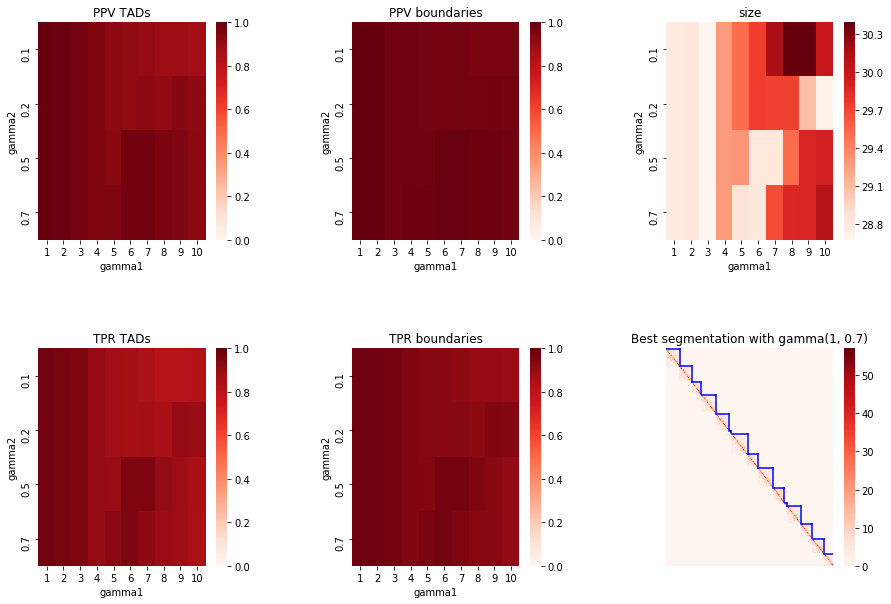

In [4]:
IS.iterative_approach(iterations=3)

In [5]:
mtx_sim = TADselect.InteractionMatrix(balance=False, ch='Sim', input_mtx='../work/data/simulations/simMTX.iter1.noise0.cool', input_type='cool')

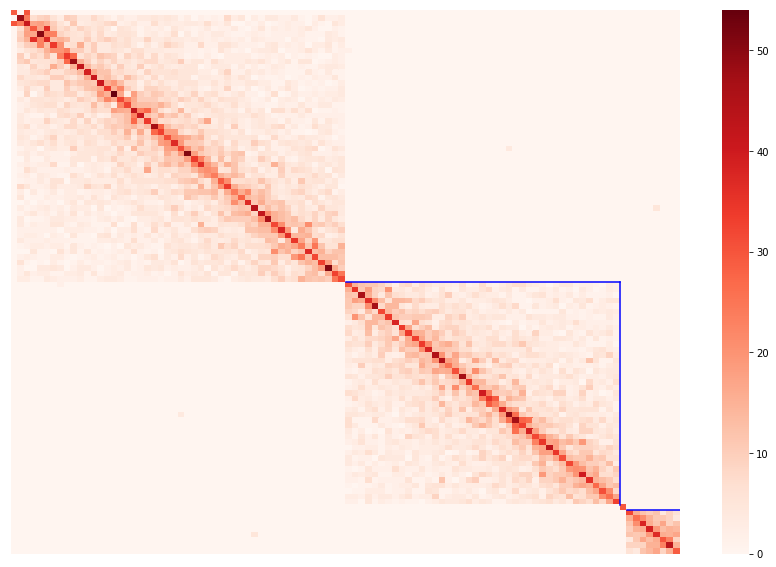

In [6]:
TADselect.Experiment.plot_tads(bgn=0, end=100, tads=IS.caller._segmentations['test'][(1, 0.7)].data, mtx=mtx_sim._mtx)

In [20]:
arm = TADselect.Experiment(['test'], ['../work/data/simulations/simMTX.iter1.noise0.cool'], data_format='cool', resolution=1, callername='lavaarmatus', chr='Sim', scaling=False, track_file='../work/data/simulations/simTADs.iter1.noise0.txt', balance=False, optimisation='simulated')

DEBUG:TADselect:Initializing from files: ['../work/data/simulations/simMTX.iter1.noise0.cool']


DEBUG:TADselect:Calling LavaburstCaller with params: gamma    [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1....
dtype: object
INFO:TADselect:NaNs filling with 0.00
gamma    [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1....
dtype: object [0.         0.0130719  0.00653595 0.0130719  0.0130719  0.0130719
 0.05228758 0.05882353 0.22222222 0.73856209 0.93464052 0.49673203
 0.07843137 0.02614379 0.00653595 0.0130719  0.0130719  0.0130719
 0.0130719  0.0130719  0.0130719 ] [[2261.          904.         1129.75        752.83333333  902.4
   752.16666667  346.76923077  300.13333333   96.89130435   35.46341463
    29.79310345   20.55102041    7.18245614    5.64754098    5.11940299
     4.96551724    4.94285714    4.90804598    4.90804598    4.93142857
     4.93714286]]
0.01960784313725486 2.751633986928104 18.900000000000002 (21,)
best gamma value is: (0.0,)
new range is:
gamma    [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0....
dtype: object


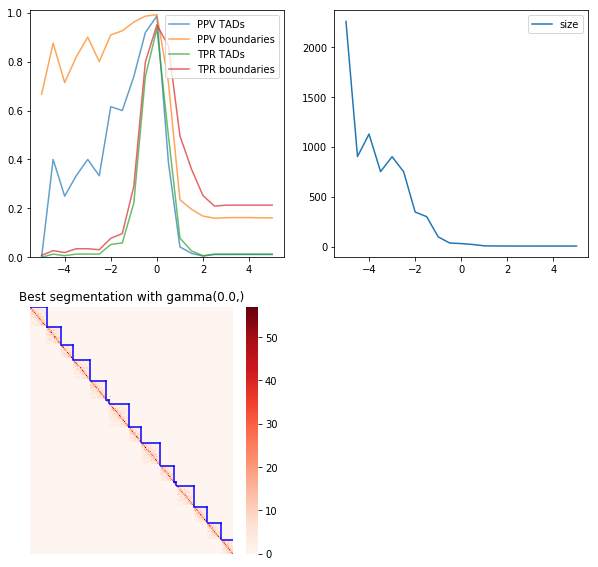

In [21]:
arm.iterative_approach(offset=3)

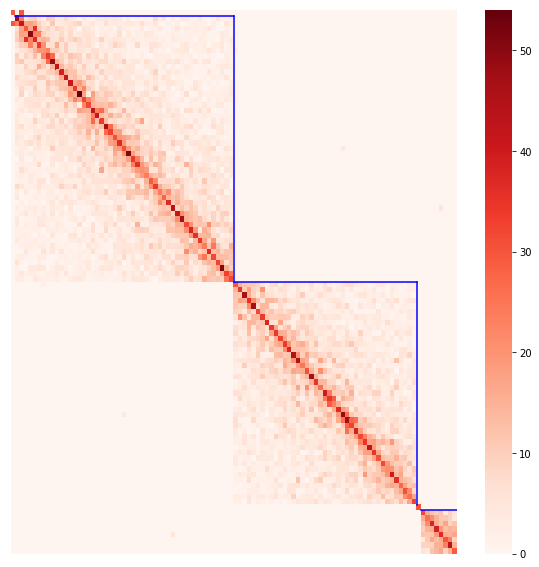

In [22]:
TADselect.Experiment.plot_tads(bgn=0, end=100, tads=arm.caller._segmentations['test'][0].data, mtx=mtx_sim._mtx)

In [3]:
a1 = TADselect.GenomicRanges([])

In [4]:
a1.length

1

In [4]:
a1.count_coef(a1, coef='JI boundaries')

0